In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

transaction_features = transactions.groupby('CustomerID').agg({'TotalValue': 'sum','TransactionID': 'count','Quantity': 'sum'        
}).reset_index()
data = customers.merge(transaction_features, on='CustomerID', how='left')
data = data.fillna(0)


In [9]:

features = data[['TotalValue', 'TransactionID', 'Quantity']]


In [4]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
db_scores = [] 
cluster_range = range(2, 11)  

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    db_scores.append(db_index)

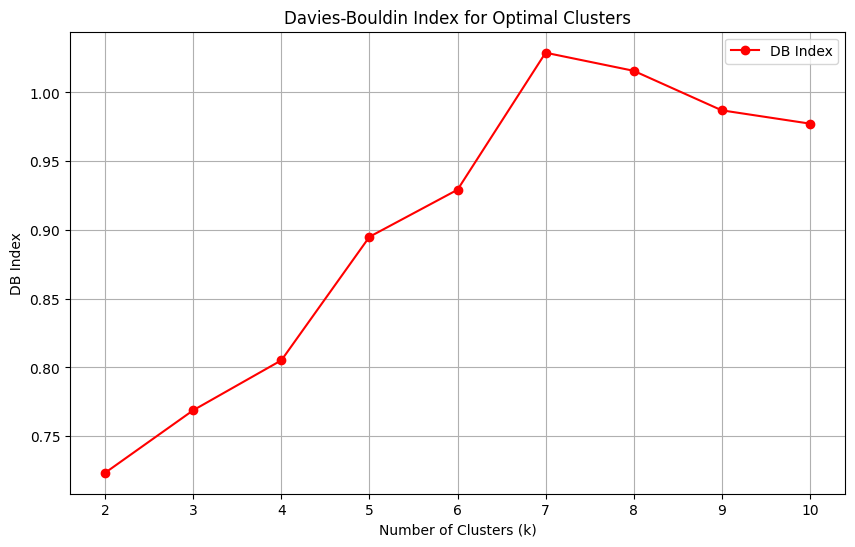

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o', color='red', label='DB Index')
plt.title('Davies-Bouldin Index for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')
plt.legend()
plt.grid()
plt.show()



In [17]:
# Save cluster assignments
data[['CustomerID', 'Cluster']].to_csv('CustomerClusters.csv', index=False)

# Print cluster counts
print(data['Cluster'].value_counts())

# Save the clustering report
with open('ClusteringReport.txt', 'w') as f:
    f.write(f'Number of Clusters: {num}\n')
    f.write(f'Davies-Bouldin Index: {db_index:.3f}\n')
    f.write('Cluster Counts:\n')
    f.write(data['Cluster'].value_counts().to_string())




Cluster
1    83
3    57
0    33
2    27
Name: count, dtype: int64
